In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### PHẦN 1: Dữ liệu OriginalSalesData

In [2]:
#==========QUÁ TRÌNH EXPLANATORY DATA ANALYSYS============
#Đây lá quá trình khai thác thông tin tri thức từ dữ liệu thông qua biểu đồ.
#Khi vẽ biểu đồ chúng ta cần đặt rá các câu hỏi
#1. Có bao nhiêu biến tham gia vào biểu đồ
#2. Loại (định tính, định lượng) của từng biến số
#3. Biểu đồ biểu diễn bao nhiêu thông tin
#4. Tri thức gì được rút trích ra từ biểu đồ
#5. Tri thức được rút trích có liên quan gì đến nghiệp vụ

In [3]:
#===========================================
#Bước 1: Xử lý dữ liệu cơ bản theo yêu cầu
#===========================================
#1.1. Đọc dữ liệu
#1.2. Loại bỏ dòng dữ liệu trống
#1.3. Loại bỏ dòng dữ liệu bị trùng
#1.4. Kiểm tra các dữ liệu thiếu bằng chart

#1.1. Đọc dữ liệu
#df = pd.read_csv('orginal_sales_data_edit.csv')
df =pd.read_csv('../data/orginal_sales_data_edit.csv', encoding='utf-8', header=0, delimiter=',')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTFULLNAME
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,DaCunha Daniel
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Young Julie
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,Freyre Diego
2819,10373,29,100.00,1,3978.51,1/31/2005,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,Koskitalo Pirkko
2820,10386,43,100.00,4,5417.57,3/1/2005,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,Freyre Diego
2821,10397,34,62.24,1,2116.16,3/28/2005,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,Roulet Annette


In [4]:
#1.2. Loại bỏ dòng dữ liệu rỗng

df.dropna(how='all', inplace=True)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTFULLNAME
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,DaCunha Daniel
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Young Julie
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,Freyre Diego
2819,10373,29,100.00,1,3978.51,1/31/2005,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,Koskitalo Pirkko
2820,10386,43,100.00,4,5417.57,3/1/2005,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,Freyre Diego
2821,10397,34,62.24,1,2116.16,3/28/2005,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,Roulet Annette


In [5]:
#1.3. Loại bỏ dữ liệu trùng, biết rằng dữ liệu trùng là dữ liệu có đồng thời ORDERNUMBER và OrDERDATE như nhau
#Kiểm tra lại nghiệp vụ này
df.drop_duplicates(inplace=True)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTFULLNAME
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,DaCunha Daniel
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Young Julie
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,Freyre Diego
2819,10373,29,100.00,1,3978.51,1/31/2005,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,Koskitalo Pirkko
2820,10386,43,100.00,4,5417.57,3/1/2005,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,Freyre Diego
2821,10397,34,62.24,1,2116.16,3/28/2005,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,Roulet Annette


e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


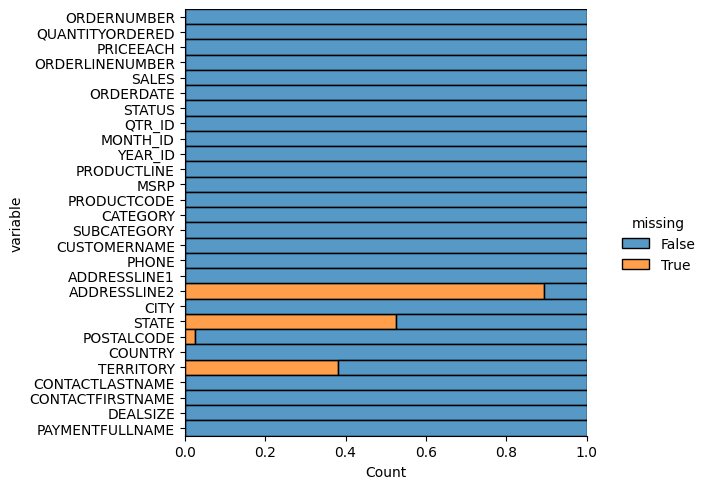

In [6]:
#1.4. Kiểm tra dữ liệu thiếu bằng chart
# Cách 2: Trực quan dữ liệu thiếu vời Seaborn Displt
plt.Figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"),
            y="variable",
            hue="missing",
            multiple="fill",
            aspect=1.25)
plt.savefig("my_missing_value_2.png",dpi=100)
#1.4.1. Điền thiếu dữ liệu với dữ liệu định tính
#1.4.1.1. Với dữ liệu biểu diễn dạng chuỗi thì thay bằng Unknown
#1.4.1.2. Với dữ liệu biểu diễn dạng số thì thay bằng 0
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#1.1. Đọc dữ liệu
df = pd.read_csv('../data/orginal_sales_data_edit.csv', encoding='utf-8', header=0, delimiter=',')

In [8]:
#1.2. Loại bỏ dòng dữ liệu rỗng
print("Dữ liệu chưa loại bỏ")
df.info

Dữ liệu chưa loại bỏ


<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

       ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSL

In [9]:
# Dữ liệu sau khi loại bỏ
print("Dữ liệu sau khi loại bỏ")
df.dropna(how='all', inplace=True)
df

Dữ liệu sau khi loại bỏ


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTFULLNAME
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,DaCunha Daniel
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Young Julie
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,Freyre Diego
2819,10373,29,100.00,1,3978.51,1/31/2005,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,Koskitalo Pirkko
2820,10386,43,100.00,4,5417.57,3/1/2005,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,Freyre Diego
2821,10397,34,62.24,1,2116.16,3/28/2005,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,Roulet Annette


LOAI BO DU LIEU TRUNG BIET RANG DU LIEU TRUNG LA DU LIEU CO DONG THOI ORDERNUMBER
V ORDERDATE NHU NHAU // KIEM TRA LAI NGHIEP VU NAY

In [10]:
#1.3. Loại bỏ dữ liệu trùng
df.drop_duplicates(inplace=True)
# KQ là 2823 dòng
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTFULLNAME
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,DaCunha Daniel
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Young Julie
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,Freyre Diego
2819,10373,29,100.00,1,3978.51,1/31/2005,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,Koskitalo Pirkko
2820,10386,43,100.00,4,5417.57,3/1/2005,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,Freyre Diego
2821,10397,34,62.24,1,2116.16,3/28/2005,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,Roulet Annette


In [11]:
# Loại bỏ các dòng dữ liệu trùng trong 2 cột ORDERNUMBER và ORDERDATE

df.drop_duplicates(subset=['ORDERNUMBER', 'ORDERDATE'], inplace=True)

In [12]:
# Kiểm tra dữ liệu trong 2 cột ORDERNUMBER và ORDERDATE sau khi loại bỏ dữ liệu trùng
# KQ là có 2733 dòng

df[['ORDERNUMBER','ORDERDATE']]

,ORDERNUMBER,ORDERDATE
0,10107,2/24/2003
1,10121,5/7/2003
2,10134,7/1/2003
3,10145,8/25/2003
4,10159,10/10/2003
...,...,...
2358,10199,12/1/2003
2532,10397,3/28/2005
2554,10352,12/3/2004
2692,10118,4/21/2003


e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


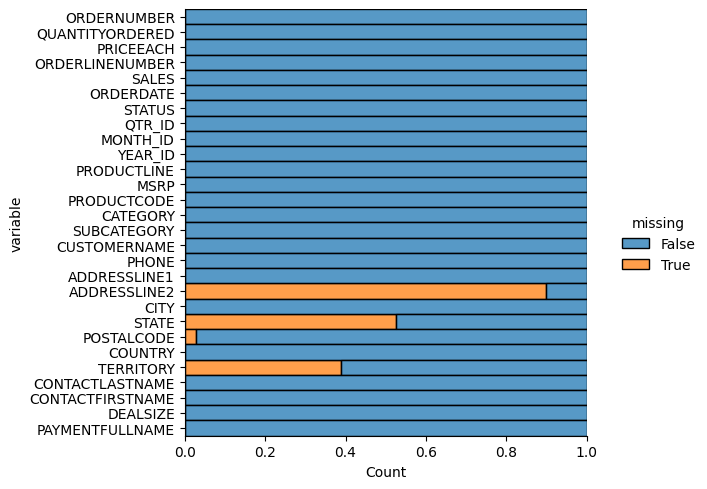

In [13]:
#1.4. Kiểm tra dữ liệu thiếu bằng chart
# Cách 2: Trực quan dữ liệu thiếu vời Seaborn Displt
plt.Figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"),
            y="variable",
            hue="missing",
            multiple="fill",
            aspect=1.25)
plt.savefig("my_missing_value_2.png",dpi=100)
#1.4.1. Điền thiếu dữ liệu với dữ liệu định tính
#1.4.1.1. Với dữ liệu biểu diễn dạng chuỗi thì thay bằng Unknown
#1.4.1.2. Với dữ liệu biểu diễn dạng số thì thay bằng 0
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

'\nSau đó, biểu đồ được lưu lại thành một tệp hình ảnh \ncó tên là "my_missing_value_2.png"\n'

<Figure size 1000x600 with 0 Axes>

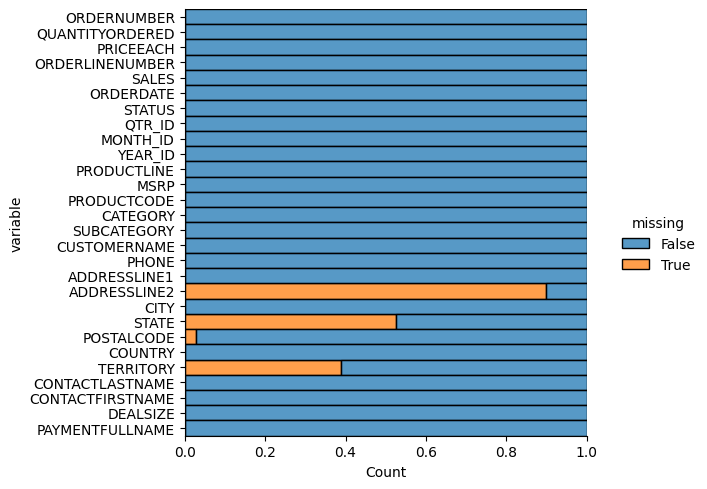

In [14]:
# Kiểm tra dữ liệu thiếu bằng chart
# Trực quan dữ liệu thiếu bằng Seaborn Displot
# Điền thiếu dữ liệu với dữ liệu định tính
# Với dữ liệu biểu diễn dạng chuỗi thì thay bằng Unknown
# Với dữ liệu biểu diễn dạng số thì thay bằng 0

plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)
plt.savefig("my_missing_value_2.png", dpi=100)

"""
Đoạn code này dùng để trực quan dữ liệu thiếu bằng Seaborn Displot
dưới dạng biểu đồ đối chiếu (heatmap) 
với các cột trên trục y, 
màu sắc để thể hiện giá trị True/False, 
và thanh được lấp đầy để biểu thị 
tỷ lệ các giá trị thiếu trong từng cột.
"""

"""
Sau đó, biểu đồ được lưu lại thành một tệp hình ảnh 
có tên là "my_missing_value_2.png"
"""

In [15]:
# Điền thiếu dữ liệu với dữ liệu định tính
# Với dữ liệu biểu diễn dạng chuỗi thì thay dữ liệu thiếu bằng Unknown
# Với dữ liệu biểu diễn dạng số thì thay bằng 0

df['ADDRESSLINE2'].fillna('Unknown', inplace=True)
df['STATE'].fillna('Unknow',inplace=True)
df['TERRITORY'].fillna('Unknown',inplace=True)
df['POSTALCODE'].fillna(0,inplace=True)
print("Xem lại thông tin")
df[['ADDRESSLINE2','STATE','TERRITORY','POSTALCODE']]

Xem lại thông tin


,ADDRESSLINE2,STATE,TERRITORY,POSTALCODE
0,Unknown,NY,Unknown,10022
1,Unknown,Unknow,EMEA,51100
2,Unknown,Unknow,EMEA,75508
3,Unknown,CA,Unknown,90003
4,Unknown,CA,Unknown,0
...,...,...,...,...
2358,Unknown,CA,Unknown,94019
2532,Unknown,Unknow,EMEA,31000
2554,Unknown,MA,Unknown,58339
2692,Unknown,Unknow,EMEA,8022


In [16]:
# Tách 1 cột thành 2 cột
df[['PAYMENTLASTNAME', 'PAYMENTFIRSTNAME']] = df['PAYMENTFULLNAME'].str.split(' ', expand=True)
df.drop('PAYMENTFULLNAME', axis=1, inplace=True)

In [17]:
# Sau đó xoá cột bị tách.
df[['PAYMENTLASTNAME', 'PAYMENTFIRSTNAME']]

,PAYMENTLASTNAME,PAYMENTFIRSTNAME
0,Yu,Kwai
1,Henriot,Paul
2,DaCunha,Daniel
3,Young,Julie
4,Brown,Julie
...,...,...
2358,Thompson,Steve
2532,Roulet,Annette
2554,Taylor,Leslie
2692,Saavedra,Eduardo


In [18]:
# Lưu dữ liệu thành file mới
df.to_csv('../data/processed_sales_data.csv', sep=',', encoding='utf-8', index=False)

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


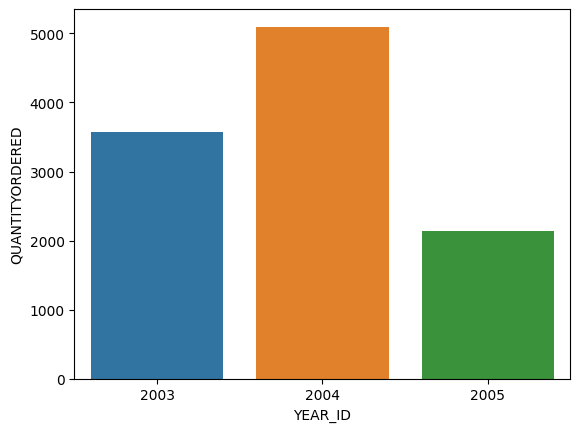

In [19]:
# Cho biết tổng số lượng sản phẩm bán được của mỗi năm
sns.barplot(x='YEAR_ID', y='QUANTITYORDERED', data=df, errorbar=None, estimator=sum)
plt.show()

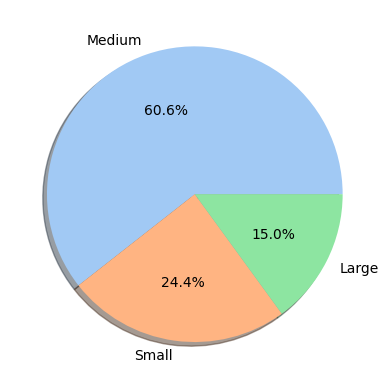

In [20]:
# Kiểm tra có bao nhiêu đơn hàng theo Dealsize
labels = df['DEALSIZE'].value_counts().index
values = df['DEALSIZE'].value_counts().values
colors = sns.color_palette('pastel')
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

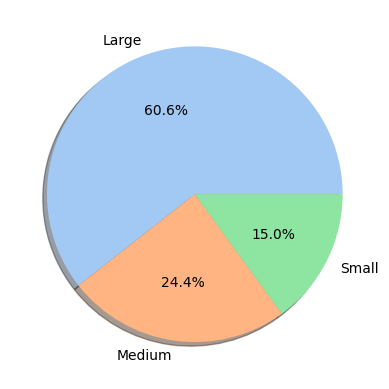

In [21]:
# Hoặc sử dụng nâng cao với nhiều tủy chỉnh trong hàm tổng hợp
# Cho biết tỉ lệ giá trị SALES theo DEALSIZE

gb = df.groupby(['DEALSIZE'])['ORDERNUMBER'].agg(['count'])
data = list(gb['count'])
labels = gb.index
colors = sns.color_palette('pastel')
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

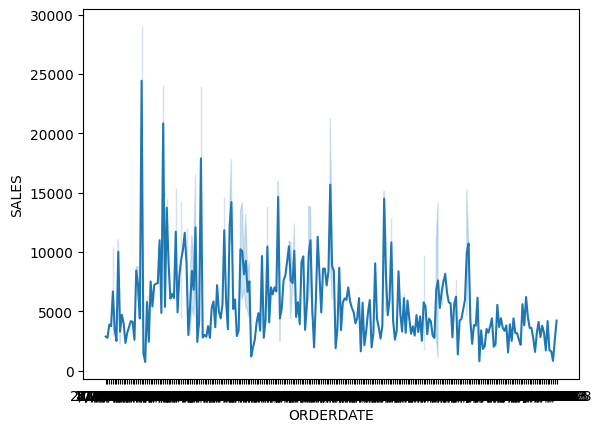

In [22]:
# Cho biết giá trị SALES theo ngày
# Cho biết tổng giá trị SALES theo ngày
sns.lineplot(x="ORDERDATE", y="SALES", data=df, estimator=sum)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

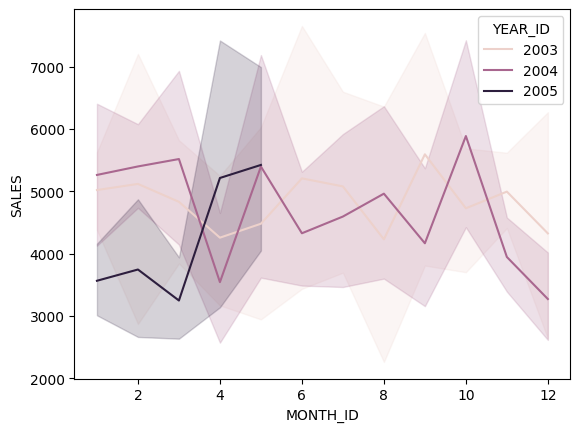

In [23]:
# Cho biết giá trị SALES trung bình theo tháng năm
sns.lineplot(x="MONTH_ID", y="SALES", hue="YEAR_ID", data=df)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

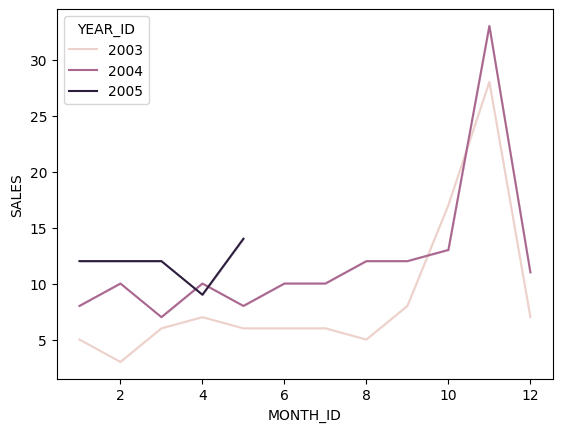

In [24]:
# Cho biết giá trị SALES theo tháng năm
from numpy import count_nonzero
sns.lineplot(x="MONTH_ID", y="SALES", hue="YEAR_ID", data=df, estimator=count_nonzero)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

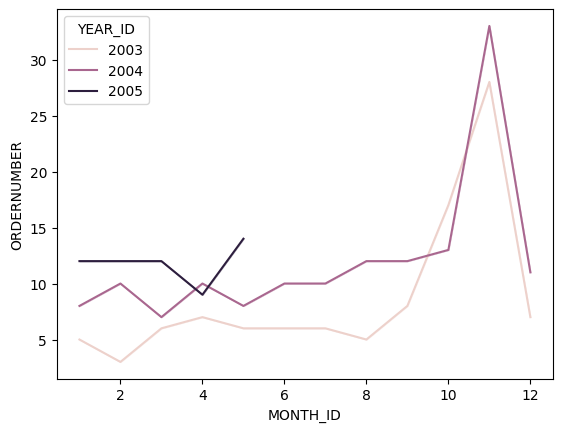

In [25]:
# Cho biết số lượng hoá đơn theo tháng, năm
# Dùng biểu đồ Line
from numpy import count_nonzero
sns.lineplot(x="MONTH_ID", y="ORDERNUMBER", hue="YEAR_ID", data=df, estimator=count_nonzero)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

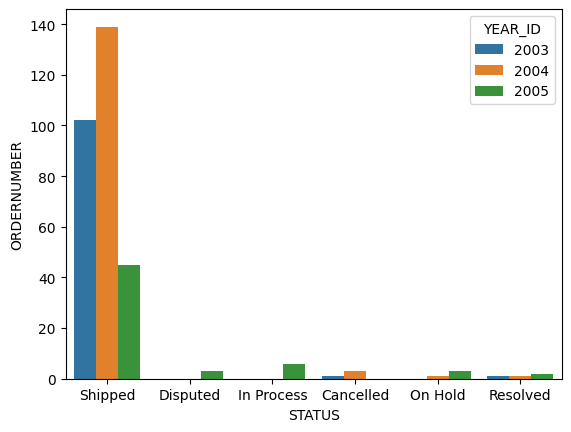

In [26]:
# Cho biết số lượng hoá đơn theo tháng, năm
# Dùng biểu đồ barplot
sns.barplot(x='STATUS', y='ORDERNUMBER', hue='YEAR_ID', data=df, errorbar=None, estimator=count_nonzero)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

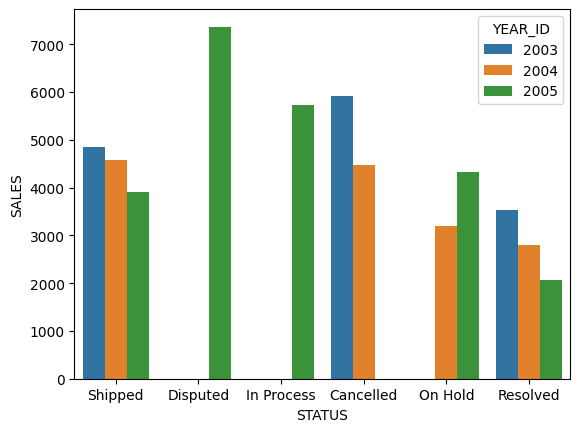

In [27]:
# Cho biết giá trị đơn hàng theo trạng thái (status) theo nhóm các năm (YEAR_ID)
# Dùng biểu đồ barplot
sns.barplot(x='STATUS', y='SALES', hue='YEAR_ID', data=df, errorbar=None)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

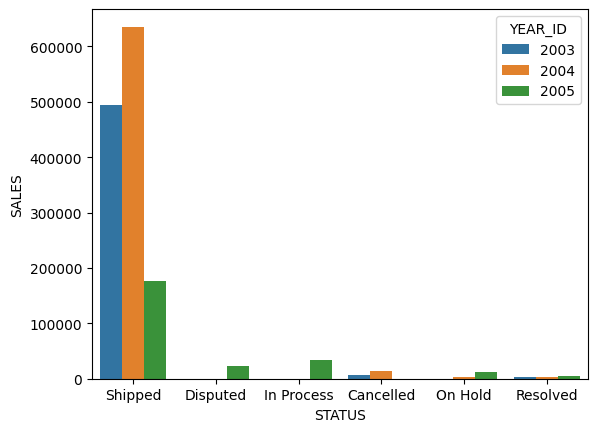

In [28]:
# Tổng giá trị đơn hàng theo trạng thái (status) theo nhóm các năm (YEAR_ID)
# Cho biết tổng giá trị đơn hàng theo từng trạng thái (STATUS) của mỗi năm
sns.barplot(x='STATUS', y='SALES', hue='YEAR_ID', data=df, errorbar=None, estimator=sum)
plt.show()

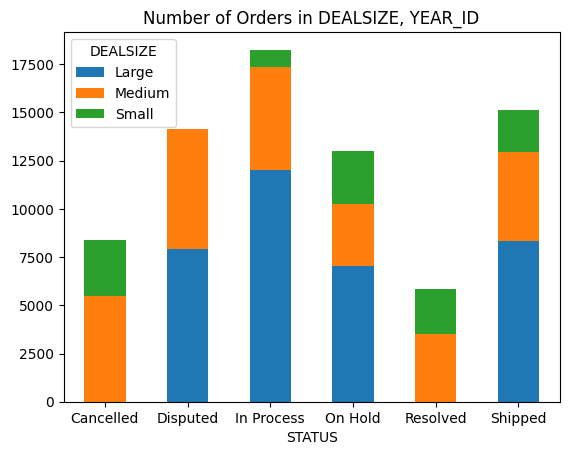

In [29]:
# Số lượng hóa đơn giữa các DEALSIZE theo YEAR_ID
# Cho biết số lượng hoá đơn giữa các nhóm DEALSIZE theo từng năm YEAR_ID

gb = df.groupby(['STATUS', 'DEALSIZE'])['SALES'].mean().unstack()
gb.plot(kind='bar', stacked=True)
plt.title('Number of Orders in DEALSIZE, YEAR_ID')
plt.xticks(rotation=0, ha='center')
plt.show()

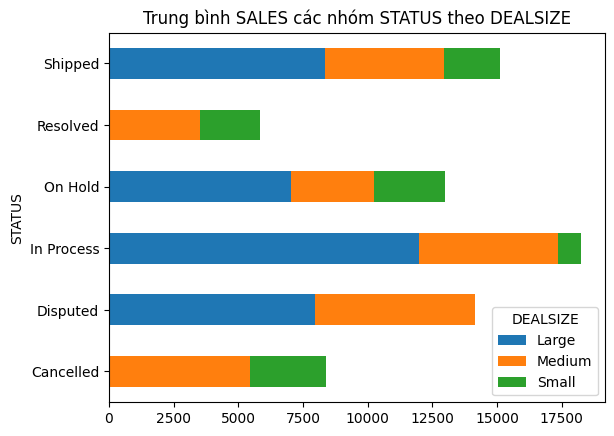

In [30]:
# Trung bình SALES các nhóm STATUS theo DEALSIZE
# Cho biết trung bình SALES theo từng STATUS và DEALSIZE

gb = df.groupby(['STATUS', 'DEALSIZE'])['SALES'].mean().unstack()
gb.plot(kind='barh', stacked=True)
plt.title('Trung bình SALES các nhóm STATUS theo DEALSIZE')
plt.xticks(rotation=0, ha='center')
plt.show()

MÔ TẢ DỮ LIỆU

In [31]:
# Mô tả dữ liệu cột QuantityOrdered
df['QUANTITYORDERED'].describe()

count    307.000000
mean      35.205212
std       10.431550
min        6.000000
25%       27.000000
50%       35.000000
75%       43.000000
max       97.000000
Name: QUANTITYORDERED, dtype: float64

MO TA DU LIEU CUA QUANTITYORDERED, PRICEEACH, SALES

In [32]:
# Mô tả dữ liệu của QUANTITYORDERED, PRICEEACH
df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].describe()

,QUANTITYORDERED,PRICEEACH,SALES
count,307.000000,307.000000,307.000000
mean,35.205212,93.351596,4588.486906
std,10.431550,14.912985,2142.986902
min,6.000000,34.910000,553.950000
25%,27.000000,96.915000,3010.500000
50%,35.000000,100.000000,4196.800000
75%,43.000000,100.000000,5855.460000
max,97.000000,100.000000,12001.000000


In [33]:
# Mô tả số lượng bán hàng theo từng DEALSIZE
df.groupby('DEALSIZE')['QUANTITYORDERED'].describe()

,count,mean,std,min,25%,50%,75%,max
DEALSIZE,,,,,,,,
Large,46.0,44.739130,11.227812,29.0,38.0,44.0,47.0,97.0
Medium,186.0,35.672043,8.395943,20.0,30.0,36.0,42.0,55.0
Small,75.0,28.200000,9.502489,6.0,22.0,25.0,33.0,49.0


KHAI THÁC SỰ PHÂN PHỐI DỮ LIỆU, CHỈ DÙNG TRÊN BIẾN ĐỊNH LƯỢNG

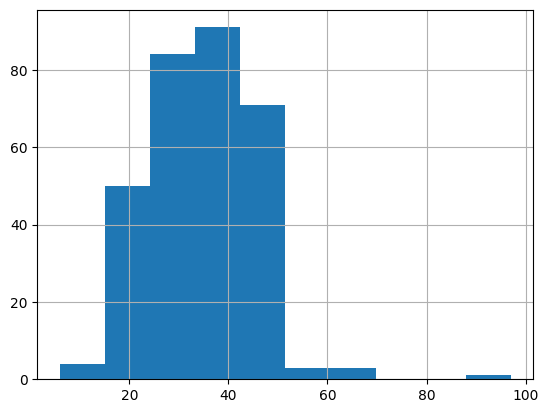

In [34]:
# Vẽ biểu đồ histogram của QUANTITYORDERED
df['QUANTITYORDERED'].hist()
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


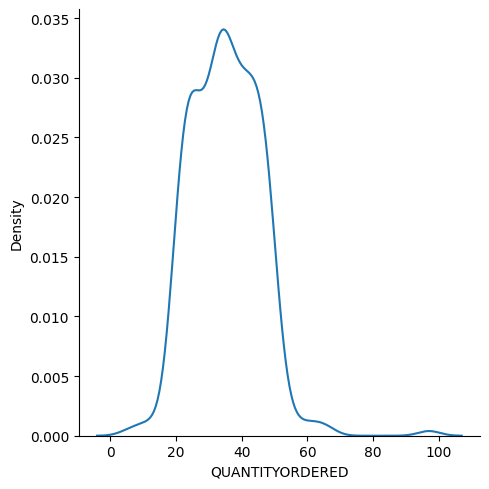

In [35]:
# Hoặc nâng cao hơn với nhiều tùy chọn
sns.displot(df, x="QUANTITYORDERED", kind="kde")
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

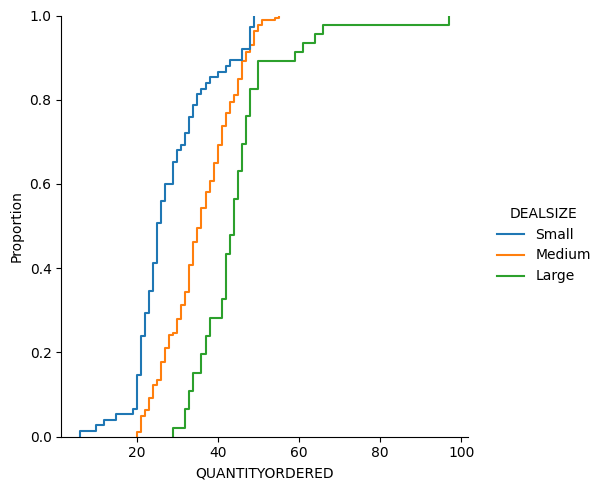

In [36]:
# Cho biết xác suất xảy ra trên mỗi đoạn
"""
Vẽ biểu đồ hist của QUANTITYORDERED theo DEALSIZE
Hoặc: Phân phối hist của QUANTITYORDERED theo nhóm DEALSIZE
"""

sns.displot(df, x="QUANTITYORDERED", hue="DEALSIZE", kind="ecdf")
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

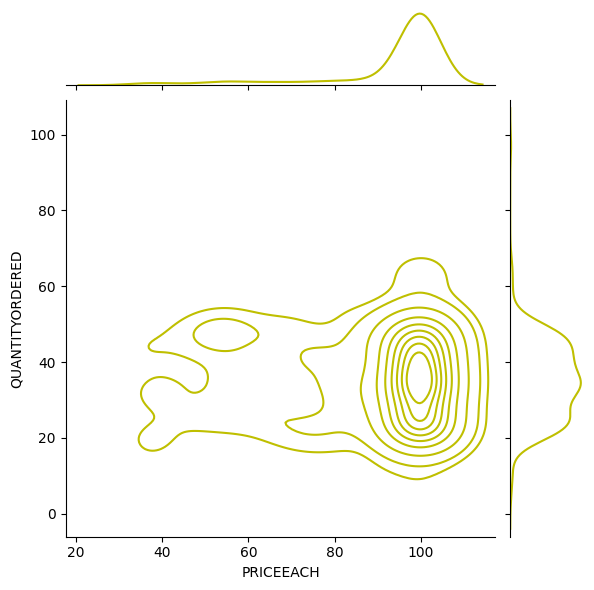

In [37]:
# Vẽ biểu đồ JoinPlot của QUANTITYORDERED và PRICEEACH
sns.jointplot(data=df, x='PRICEEACH', y='QUANTITYORDERED', kind='kde', color='y')

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

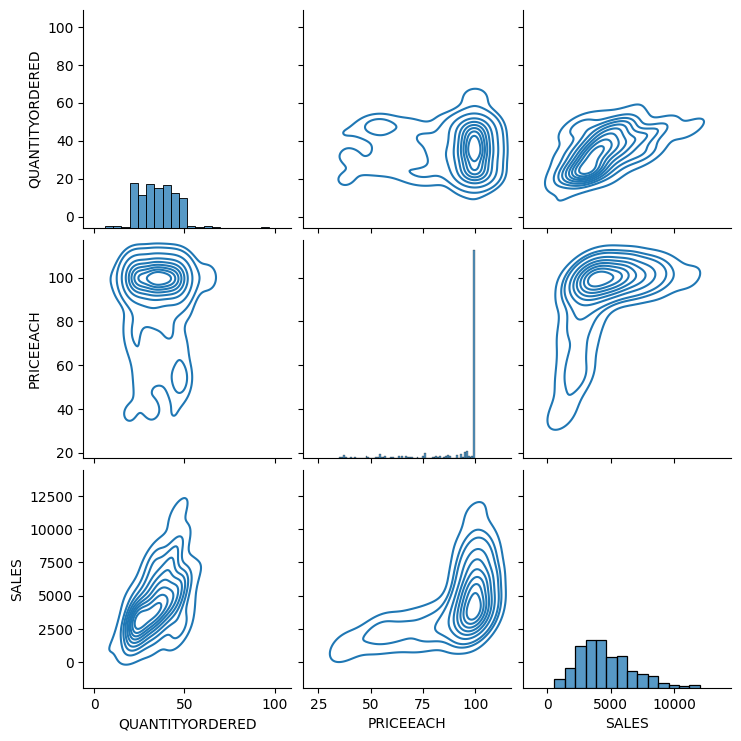

In [38]:
# Vẽ biểu đồ PairPlot của QUANTITYORDERED và PRICEEACH
sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']], diag_kind='hist', kind='kde')
plt.show()

BIỂU DIỄN TƯƠNG QUAN BIẾN SỐ THEO TỪNG CẶP

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

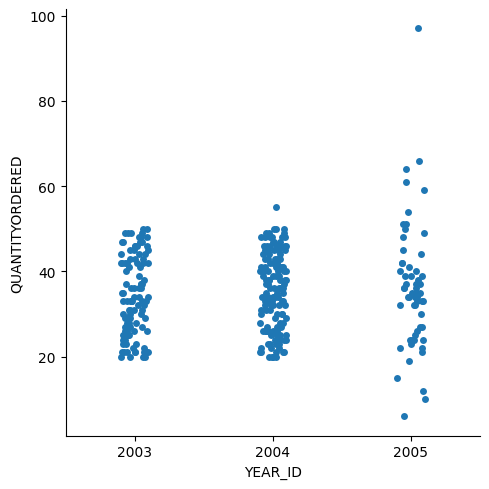

In [39]:
# Vẽ trực quan số lượng sản phẩm phân phối theo năm của QuantityOrdered (catplot)
sns.catplot(x='YEAR_ID', y='QUANTITYORDERED', data=df)
plt.show()

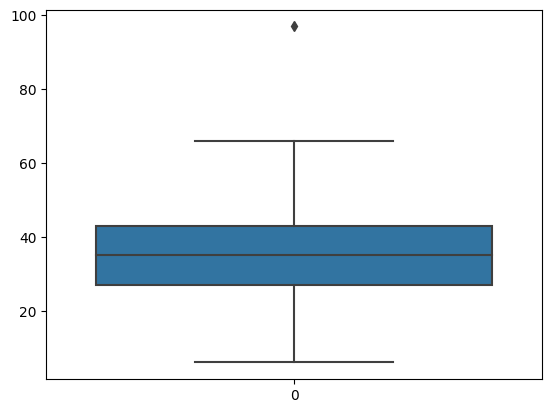

In [40]:
# Vẽ trực quan số lượng sản phẩm phân phối theo năm của QuantityOrdered (boxplot)
sns.boxplot(data=df['QUANTITYORDERED'])
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


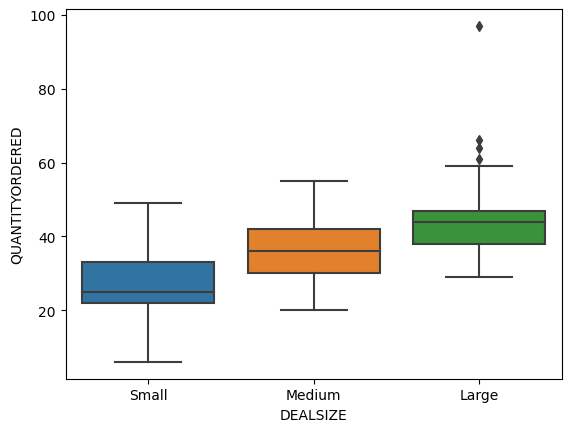

In [41]:
# Biểu diễn boxplot của QUANTITYORDERED theo nhóm DEALSIZE
sns.boxplot(x='DEALSIZE', y='QUANTITYORDERED', data=df)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

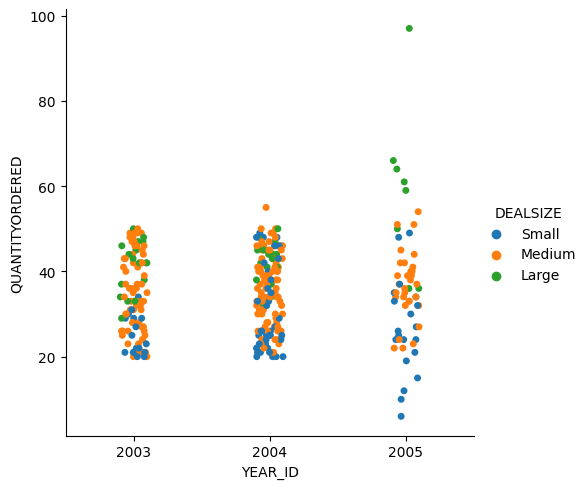

In [42]:
# Biểu diễn catplot của QUANTITYORDERED theo nhóm DEALSIZE
sns.catplot(x='YEAR_ID', y='QUANTITYORDERED', hue='DEALSIZE', data=df)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

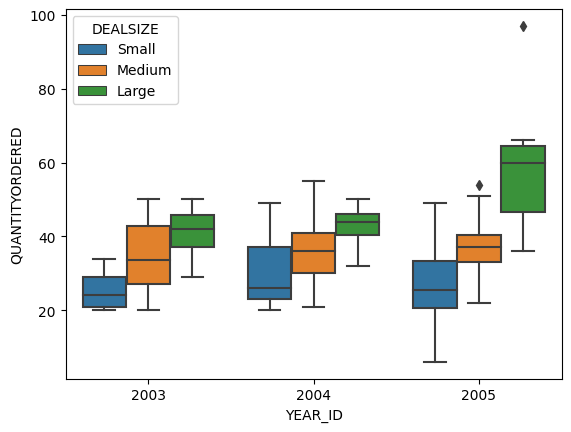

In [43]:
# Biểu diễn boxplot của QUANTITYORDERED theo năm, nhóm DEALSIZE
sns.boxplot(x='YEAR_ID', y='QUANTITYORDERED', hue='DEALSIZE', data=df)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


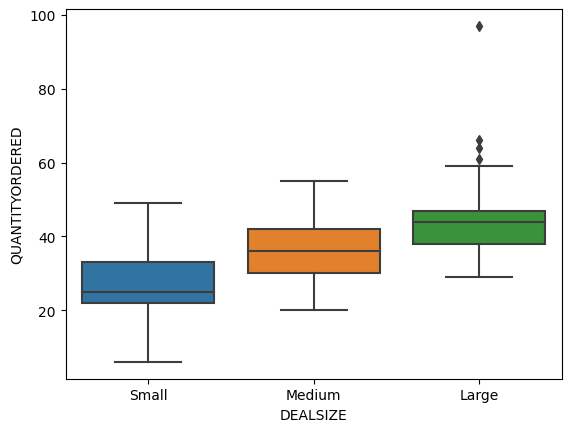

In [44]:
# Biểu diễn boxplot của QUANTITYORDERED, PRICEEACH
sns.boxplot(x='DEALSIZE', y='QUANTITYORDERED', data=df)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

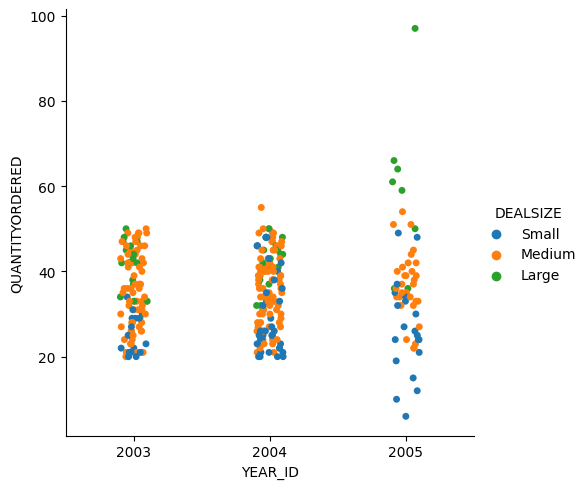

In [45]:
# Biểu diễn catplot của QUANTITYORDERED theo nhóm DEALSIZE
sns.catplot(x='YEAR_ID', y='QUANTITYORDERED', hue='DEALSIZE', data=df)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

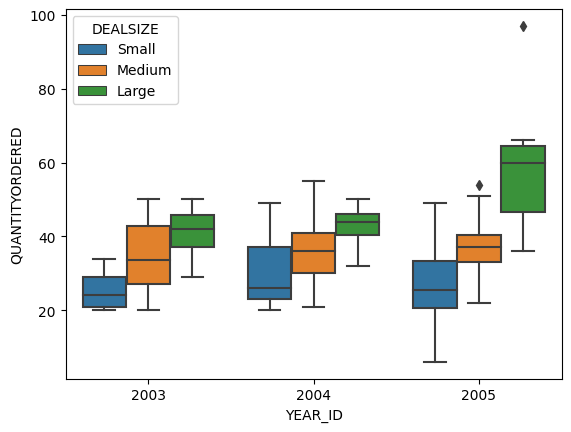

In [46]:
# Biểu diễn boxplot của QUANTITYORDERED theo nhóm DEALSIZE
sns.boxplot(x='YEAR_ID', y='QUANTITYORDERED', hue='DEALSIZE', data=df)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


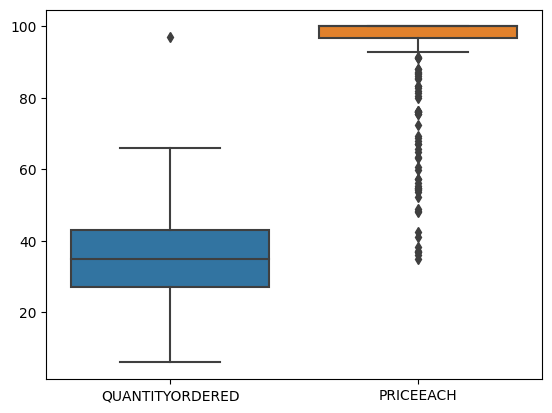

In [47]:
# Biểu diễn boxplot của QUANTITYORDERED, PRICEEACH
sns.boxplot(data=df[['QUANTITYORDERED', 'PRICEEACH']])
plt.show()

In [48]:
# Độ xiên (skew) của phân phối của QUANTITYORDERED, PRICEEACH

df[['QUANTITYORDERED', 'PRICEEACH']].skew()

QUANTITYORDERED    0.708820
PRICEEACH         -2.424483
dtype: float64

In [49]:
# Độ nhọn (kurtosis) của phân phối của QUANTITYORDERED, PRICEEACH

df[['QUANTITYORDERED', 'PRICEEACH']].kurtosis()

QUANTITYORDERED    3.218123
PRICEEACH          4.959410
dtype: float64

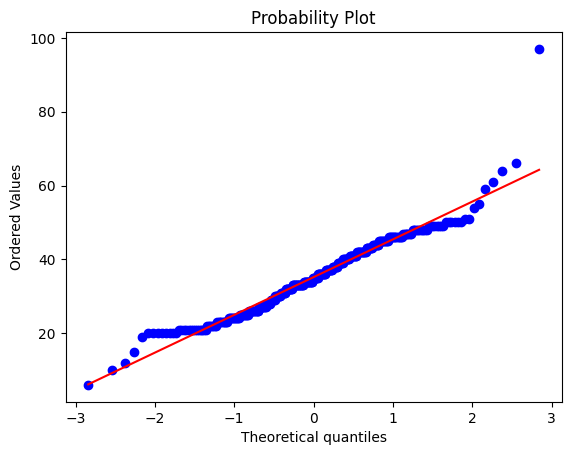

In [50]:
# Kiểm tra tính chuẩn (normal distribution) của QUANTITYORDERED, PRICE, SALES
from scipy import stats
stats.probplot(df['QUANTITYORDERED'], plot=sns.mpl.pyplot)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


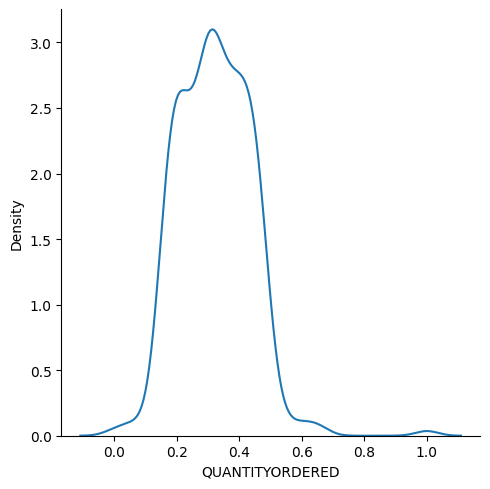

In [51]:
# Thực hiện normalize dữ liệu QUANTITYORDERED
from sklearn import preprocessing
min_max_scalers = preprocessing.MinMaxScaler()
df[['QUANTITYORDERED']] = min_max_scalers.fit_transform(df[['QUANTITYORDERED']])
sns.displot(df, x="QUANTITYORDERED", kind="kde")
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


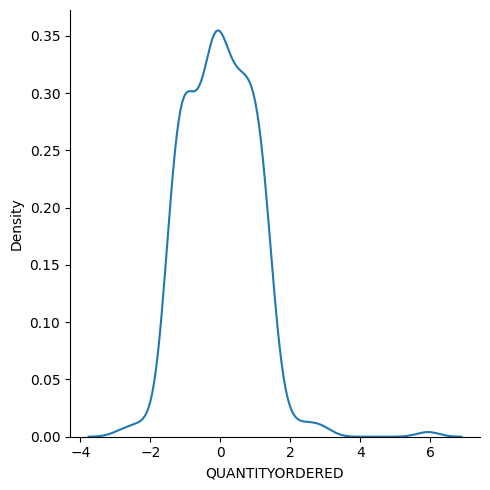

In [52]:
# Thực hiện standardization dữ liệu QUANTITYORDERED
# Cách 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['QUANTITYORDERED']] = scaler.fit_transform(df[['QUANTITYORDERED']])
sns.displot(df, x="QUANTITYORDERED", kind="kde")
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


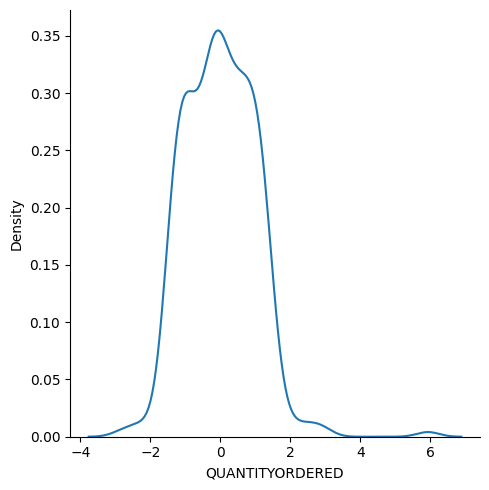

In [53]:
# Thực hiện standardization dữ liệu QUANTITYORDERED
# Cách 2
from scipy import stats
df['QUANTITYORDERED'] = stats.zscore(df['QUANTITYORDERED'])
stats.zscore(df['QUANTITYORDERED'])
sns.displot(df, x="QUANTITYORDERED", kind="kde")
plt.show()

In [54]:
"""
Ma trận tương quan tuyến tính của các cặp
QUANTITYORDERED, PRICEEACH, SALES
"""

df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr()

,QUANTITYORDERED,PRICEEACH,SALES
QUANTITYORDERED,1.000000,-0.002066,0.567122
PRICEEACH,-0.002066,1.000000,0.512066
SALES,0.567122,0.512066,1.000000


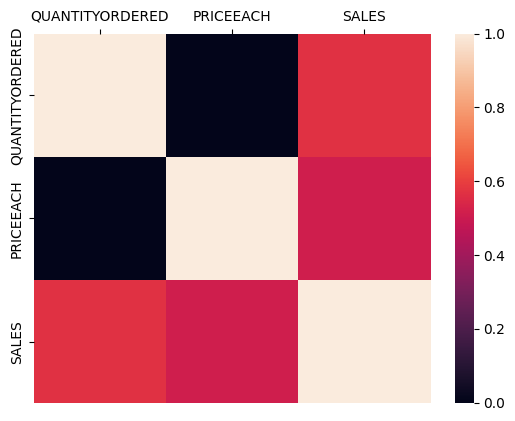

In [55]:
"""
Vẽ biểu đồ heatmap tương quan giữa các cặp
QUANTITYORDERED, PRICEEACH, SALES
"""

sns.heatmap(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr(), vmax=1.0, square=False).xaxis.tick_top()

In [56]:
# Tương quan của biến QUANTITYORDERED, PRICEEACH, SALES theo nhóm DEALSIZE

df.groupby('DEALSIZE')[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr()

QUANTITYORDERED  PRICEEACH     SALES
DEALSIZE                                                      
Large    QUANTITYORDERED         1.000000  -0.701533  0.258853
         PRICEEACH              -0.701533   1.000000 -0.077445
         SALES                   0.258853  -0.077445  1.000000
Medium   QUANTITYORDERED         1.000000  -0.331658  0.397209
         PRICEEACH              -0.331658   1.000000  0.320828
         SALES                   0.397209   0.320828  1.000000
Small    QUANTITYORDERED         1.000000  -0.544644  0.294691
         PRICEEACH              -0.544644   1.000000  0.586297
         SALES                   0.294691   0.586297  1.000000

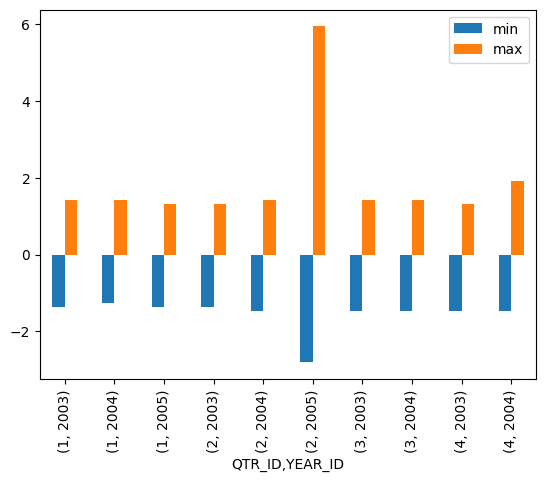

In [57]:
# Vẽ biểu đồ cho biết giá trị min, max của số lượng sản phẩm trong mỗi đơn hàng theo quý, năm
gb = df.groupby(['QTR_ID', 'YEAR_ID'])['QUANTITYORDERED'].agg(['min', 'max'])
gb.plot(kind='bar', stacked=False)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

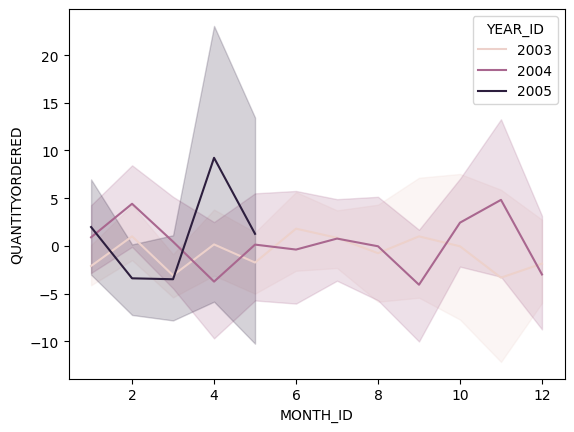

In [58]:
# Vẽ biểu đồ cho biết số lượng sản phẩm theo tháng 
sns.lineplot(x="MONTH_ID", y="QUANTITYORDERED", hue="YEAR_ID", data=df, estimator=sum)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


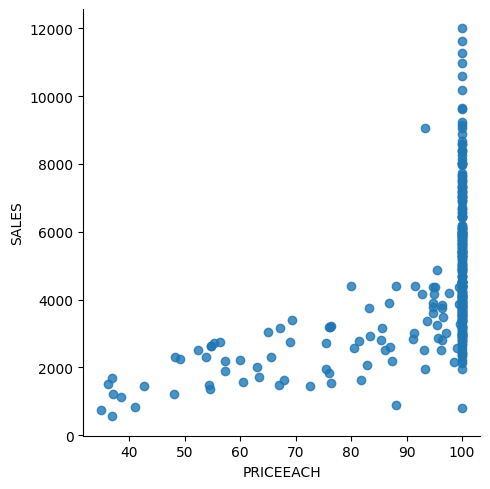

In [59]:
# Vẽ biểu đồ cho biết quan hệ giữa SALES (Oy) và đơn giá (Ox)
# Dùng biểu đồ scatter
sns.lmplot(data=df, x='PRICEEACH', y='SALES', fit_reg=False)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


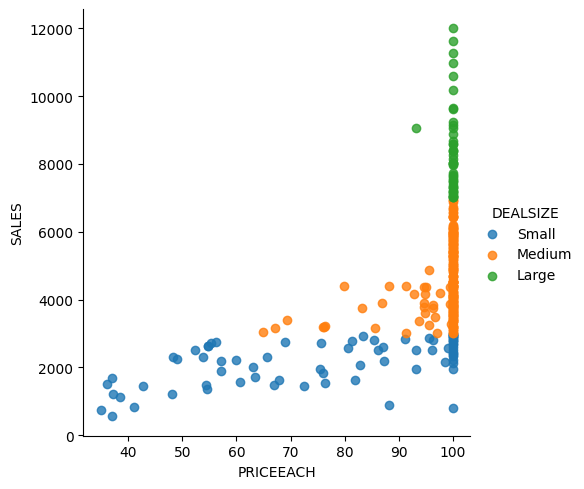

In [60]:
# Vẽ biểu đồ cho biết quan hệ giữa SALES (Oy) và đơn giá (Ox)
# Dùng biểu đồ scatter
sns.lmplot(data=df, x='PRICEEACH', y='SALES', hue='DEALSIZE', fit_reg=False)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

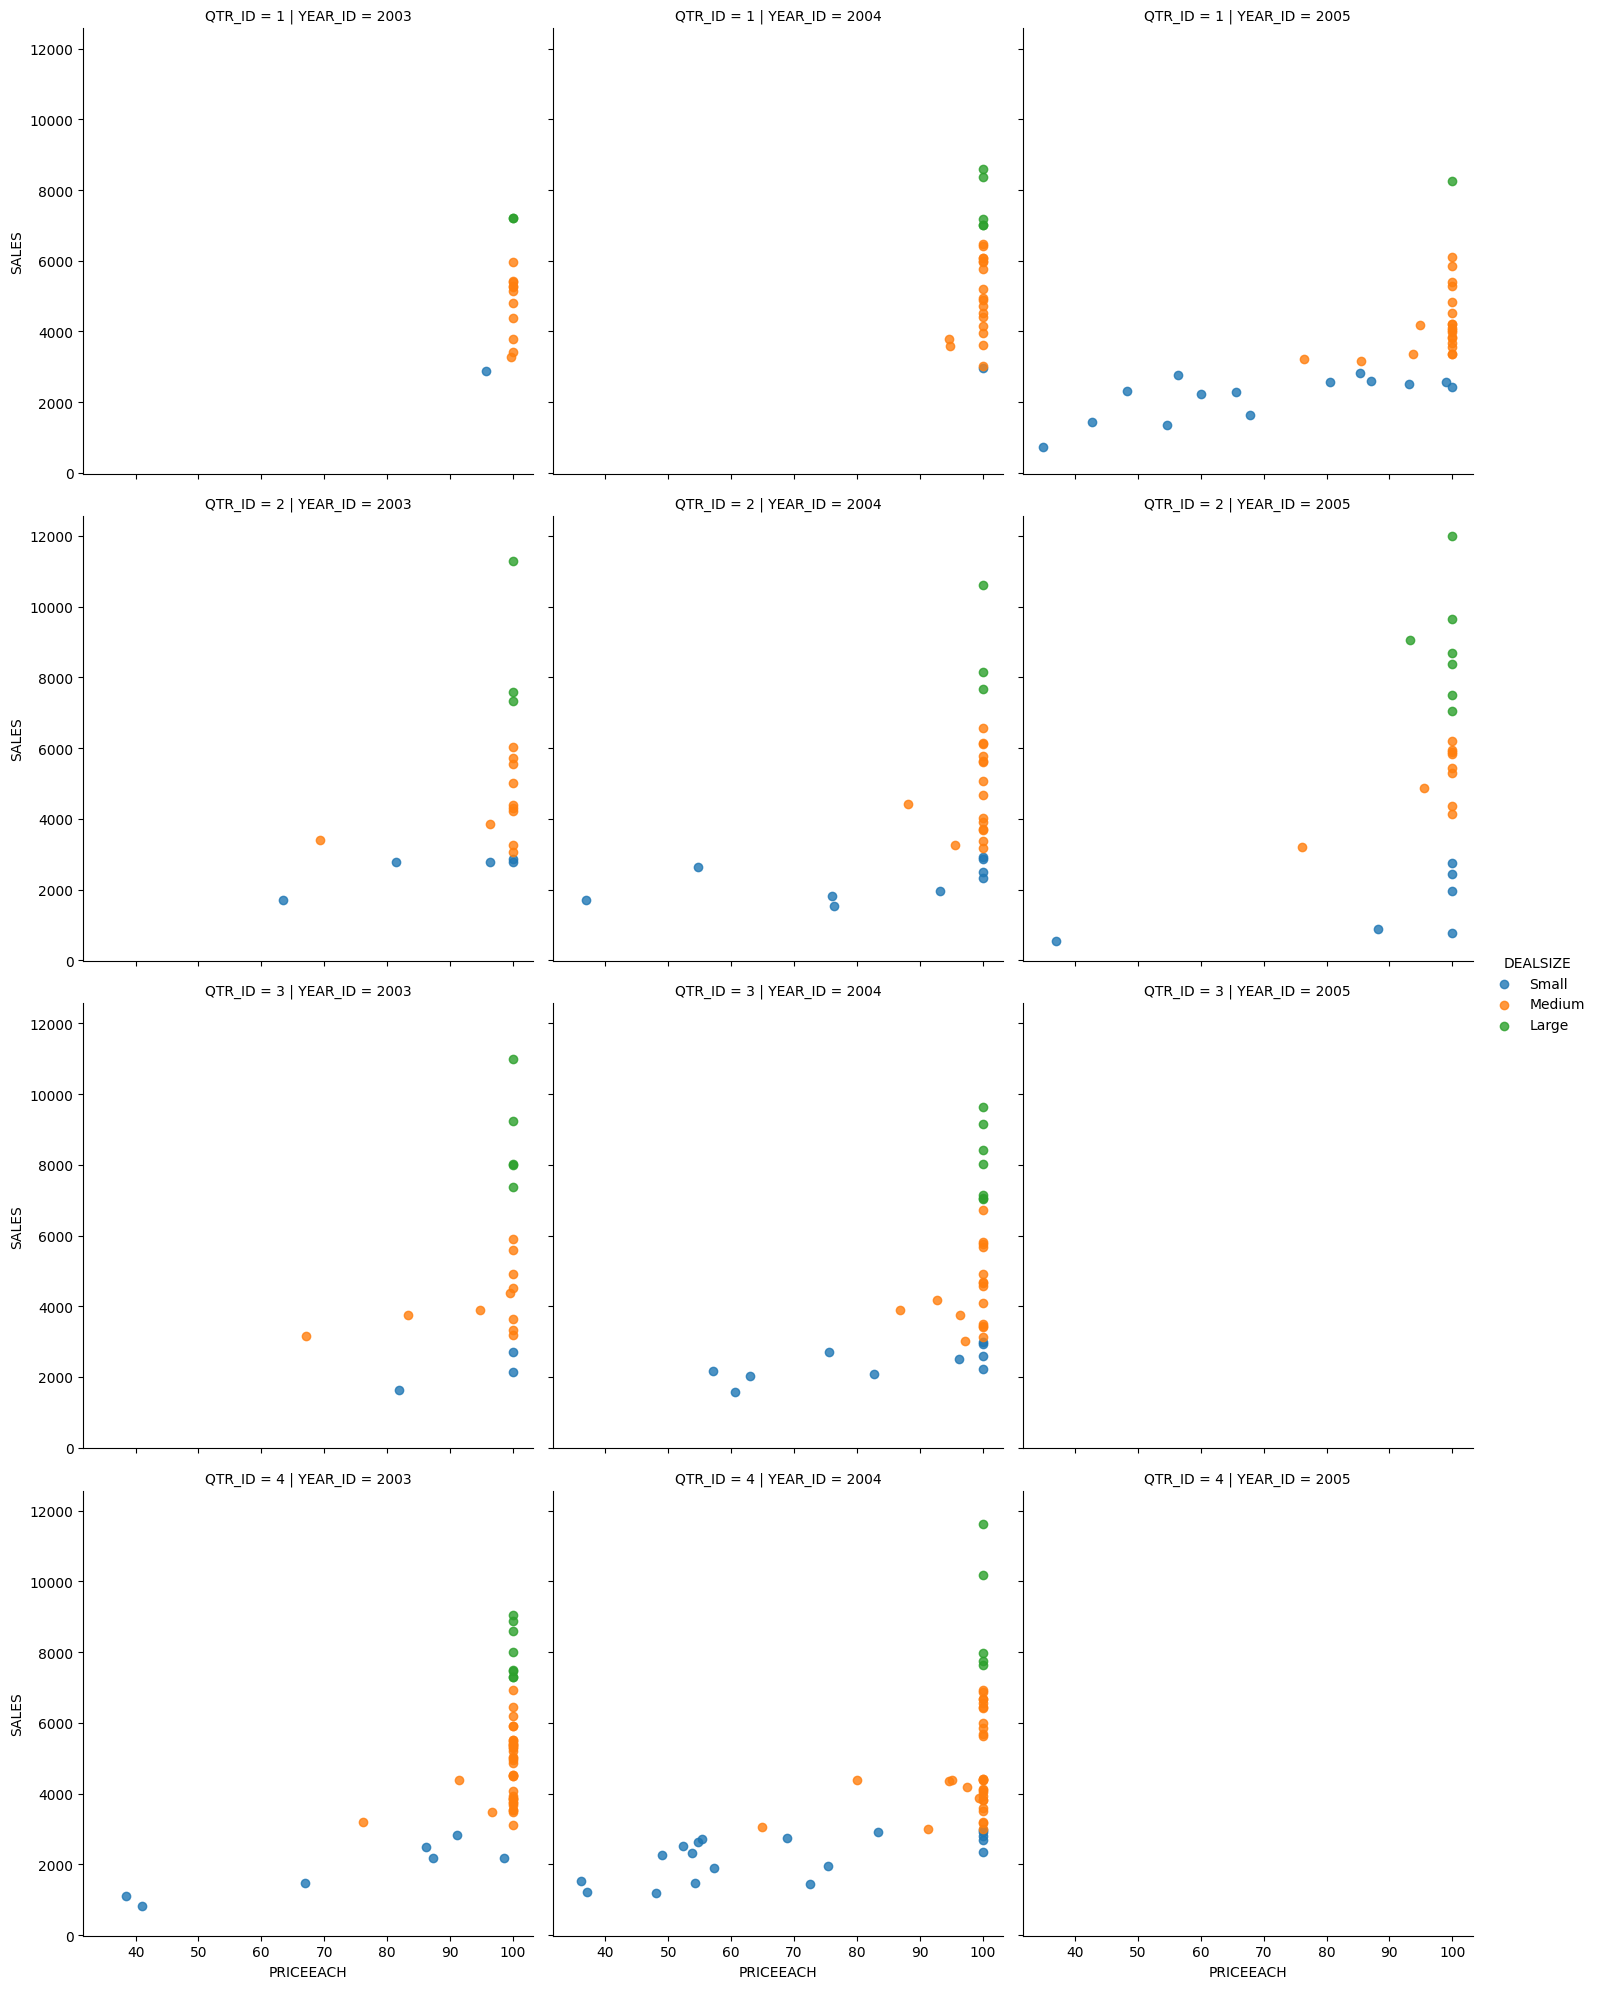

In [61]:
"""
Vẽ biểu đồ cho biết quan hệ giữa SALES (Oy) và đơn giá (Ox) theo nhóm DEALSIZE
qua các năm (YEAR_ID) theo cột và theo quý qua dòng
"""

sns.lmplot(data=df, x='PRICEEACH', y='SALES', hue='DEALSIZE', col='YEAR_ID', row='QTR_ID', fit_reg=False)
plt.show()

In [62]:
# Sắp xếp dữ liệu theo SALES tăng dần
df.sort_values(by='SALES', ascending=True)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTLASTNAME,PAYMENTFIRSTNAME
2044,10408,-1.940095,36.93,1,553.95,4/22/2005,Shipped,2,4,2005,...,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Small,Shimamura,Akiko
22,10375,-1.363978,34.91,12,733.11,2/3/2005,Shipped,1,2,2005,...,Nantes,Unknow,44000,France,EMEA,Labrune,Janine,Small,Labrune,Janine
751,10409,-2.804271,100.00,2,785.64,4/23/2005,Shipped,2,4,2005,...,Singapore,Unknow,69045,Singapore,APAC,Victorino,Wendy,Small,Victorino,Wendy
2356,10156,-1.459998,41.02,1,820.40,10/8/2003,Shipped,4,10,2003,...,Madrid,Unknow,28034,Spain,EMEA,Freyre,Diego,Small,Freyre,Diego
907,10423,-2.420193,88.14,1,881.40,5/30/2005,In Process,2,5,2005,...,Bruxelles,Unknow,B-1180,Belgium,EMEA,Dewey,Catherine,Small,Dewey,Catherine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,10247,0.844472,100.00,2,10606.20,5/5/2004,Shipped,2,5,2004,...,Espoo,Unknow,FIN-02271,Finland,EMEA,Suominen,Kalle,Large,Suominen,Kalle
30,10150,0.940491,100.00,8,10993.50,9/19/2003,Shipped,3,9,2003,...,Singapore,Unknow,79903,Singapore,Japan,Natividad,Eric,Large,Natividad,Eric
188,10127,1.036511,100.00,2,11279.20,6/3/2003,Shipped,2,6,2003,...,NYC,NY,10022,USA,Unknown,Young,Jeff,Large,Young,Jeff
44,10312,1.228550,100.00,3,11623.70,10/21/2004,Shipped,4,10,2004,...,San Rafael,CA,97562,USA,Unknown,Nelson,Valarie,Large,Nelson,Valarie


In [63]:
"""
Sắp xếp dữ liệu tăng dần
nhưng khi trùng lắp sẽ xét theo mục giảm dần ở cột khác
"""

df.sort_values(by=['QUANTITYORDERED', 'PRICEEACH'], ascending=[True, False])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTLASTNAME,PAYMENTFIRSTNAME
751,10409,-2.804271,100.00,2,785.64,4/23/2005,Shipped,2,4,2005,...,Singapore,Unknow,69045,Singapore,APAC,Victorino,Wendy,Small,Victorino,Wendy
907,10423,-2.420193,88.14,1,881.40,5/30/2005,In Process,2,5,2005,...,Bruxelles,Unknow,B-1180,Belgium,EMEA,Dewey,Catherine,Small,Dewey,Catherine
185,10419,-2.228154,100.00,13,1961.28,5/17/2005,Shipped,2,5,2005,...,Salzburg,Unknow,5020,Austria,EMEA,Pipps,Georg,Small,Pipps,Georg
2044,10408,-1.940095,36.93,1,553.95,4/22/2005,Shipped,2,4,2005,...,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Small,Shimamura,Akiko
132,10414,-1.556017,100.00,3,2764.88,5/6/2005,On Hold,2,5,2005,...,Boston,MA,51003,USA,Unknown,Yoshido,Juri,Small,Yoshido,Juri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,10407,2.284765,100.00,11,7048.14,4/22/2005,On Hold,2,4,2005,...,San Jose,CA,94217,USA,Unknown,Frick,Sue,Large,Frick,Sue
473,10406,2.476804,100.00,3,8374.69,4/15/2005,Disputed,2,4,2005,...,Kobenhavn,Unknow,1734,Denmark,EMEA,Petersen,Jytte,Large,Petersen,Jytte
131,10400,2.764862,100.00,9,9661.44,4/1/2005,Shipped,2,4,2005,...,San Jose,CA,94217,USA,Unknown,Frick,Sue,Large,Frick,Sue
25,10417,2.956902,100.00,2,7516.08,5/13/2005,Disputed,2,5,2005,...,Madrid,Unknow,28034,Spain,EMEA,Freyre,Diego,Large,Freyre,Diego


LỌC DATAFRAME

In [64]:
# Hiển thị các dòng có Sales>5000
# Cách 1
df[df['SALES']>5000]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTLASTNAME,PAYMENTFIRSTNAME
4,10159,1.324569,100.0,14,5205.27,10/10/2003,Shipped,4,10,2003,...,San Francisco,CA,0,USA,Unknown,Brown,Julie,Medium,Brown,Julie
7,10188,1.228550,100.0,1,5512.32,11/18/2003,Shipped,4,11,2003,...,Bergen,Unknow,N 5804,Norway,EMEA,Oeztan,Veysel,Medium,Oeztan,Veysel
20,10341,0.556413,100.0,9,7737.93,11/24/2004,Shipped,4,11,2004,...,Salzburg,Unknow,5020,Austria,EMEA,Pipps,Georg,Large,Pipps,Georg
25,10417,2.956902,100.0,2,7516.08,5/13/2005,Disputed,2,5,2005,...,Madrid,Unknow,28034,Spain,EMEA,Freyre,Diego,Large,Freyre,Diego
26,10103,-0.883880,100.0,11,5404.62,1/29/2003,Shipped,1,1,2003,...,Stavern,Unknow,4110,Norway,EMEA,Bergulfsen,Jonas,Medium,Bergulfsen,Jonas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,10421,-0.019704,100.0,1,5433.75,5/29/2005,In Process,2,5,2005,...,San Rafael,CA,97562,USA,Unknown,Nelson,Valarie,Medium,Nelson,Valarie
990,10128,0.556413,100.0,2,5544.02,6/6/2003,Shipped,2,6,2003,...,Madrid,Unknow,28034,Spain,EMEA,Freyre,Diego,Medium,Freyre,Diego
993,10166,0.748452,100.0,2,6930.74,10/21/2003,Shipped,4,10,2003,...,New Bedford,MA,50553,USA,Unknown,Benitez,Violeta,Medium,Benitez,Violeta
1226,10249,1.036511,100.0,5,5600.50,5/8/2004,Shipped,2,5,2004,...,Cambridge,MA,51247,USA,Unknown,Tseng,Kyung,Medium,Tseng,Kyung


In [65]:
# Hiển thị các dòng có Sales>5000
# Cách 2
df.loc[df['SALES']>5000]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTLASTNAME,PAYMENTFIRSTNAME
4,10159,1.324569,100.0,14,5205.27,10/10/2003,Shipped,4,10,2003,...,San Francisco,CA,0,USA,Unknown,Brown,Julie,Medium,Brown,Julie
7,10188,1.228550,100.0,1,5512.32,11/18/2003,Shipped,4,11,2003,...,Bergen,Unknow,N 5804,Norway,EMEA,Oeztan,Veysel,Medium,Oeztan,Veysel
20,10341,0.556413,100.0,9,7737.93,11/24/2004,Shipped,4,11,2004,...,Salzburg,Unknow,5020,Austria,EMEA,Pipps,Georg,Large,Pipps,Georg
25,10417,2.956902,100.0,2,7516.08,5/13/2005,Disputed,2,5,2005,...,Madrid,Unknow,28034,Spain,EMEA,Freyre,Diego,Large,Freyre,Diego
26,10103,-0.883880,100.0,11,5404.62,1/29/2003,Shipped,1,1,2003,...,Stavern,Unknow,4110,Norway,EMEA,Bergulfsen,Jonas,Medium,Bergulfsen,Jonas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,10421,-0.019704,100.0,1,5433.75,5/29/2005,In Process,2,5,2005,...,San Rafael,CA,97562,USA,Unknown,Nelson,Valarie,Medium,Nelson,Valarie
990,10128,0.556413,100.0,2,5544.02,6/6/2003,Shipped,2,6,2003,...,Madrid,Unknow,28034,Spain,EMEA,Freyre,Diego,Medium,Freyre,Diego
993,10166,0.748452,100.0,2,6930.74,10/21/2003,Shipped,4,10,2003,...,New Bedford,MA,50553,USA,Unknown,Benitez,Violeta,Medium,Benitez,Violeta
1226,10249,1.036511,100.0,5,5600.50,5/8/2004,Shipped,2,5,2004,...,Cambridge,MA,51247,USA,Unknown,Tseng,Kyung,Medium,Tseng,Kyung


In [66]:
# Hiển thị các dòng có Sales>5000 và QuantityOrdered>40
df[(df['SALES']>5000) &(df['QUANTITYORDERED']>40)]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTLASTNAME,PAYMENTFIRSTNAME


TẠO CỘT MỚI VÀ GÁN THUỘC TÍNH MỚI TRÊN BẢNG

In [67]:
# Lọc ra các dòng có Priceeach<65, nếu có thay giá trị bằng Cheap, ngược lại thay bằng Expensive
df.loc[df['PRICEEACH']<65,'FLAG']='CHEAP'
df.loc[df['PRICEEACH']>=65,'FLAG']='EXPENSIVE'
df[['PRICEEACH','FLAG']]

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_6152\2107790687.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'CHEAP' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['PRICEEACH']<65,'FLAG']='CHEAP'


,PRICEEACH,FLAG
0,95.70,EXPENSIVE
1,81.35,EXPENSIVE
2,94.74,EXPENSIVE
3,83.26,EXPENSIVE
4,100.00,EXPENSIVE
...,...,...
2358,38.40,CHEAP
2532,80.55,EXPENSIVE
2554,100.00,EXPENSIVE
2692,100.00,EXPENSIVE


In [68]:
# Viết hàm foo(x) nếu x<10 trả về Bad, nếu x>=10 và <50 trả về Good, ngược lại trả về Excellent
def foo(x):
    if x < 10 :
        return 'BAD'
    elif x >= 10 and x < 50:
        return 'GODD'
    else:
        return 'EXCELLENT'

# Áp dụng cho cột month
df['MONTH']= df[['QUANTITYORDERED']].applymap(foo)

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_6152\4099552912.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['MONTH']= df[['QUANTITYORDERED']].applymap(foo)


In [69]:
# Hiển thị kết quả
df[['QUANTITYORDERED','MONTH']]

,QUANTITYORDERED,MONTH
0,-0.499802,BAD
1,-0.115724,BAD
2,0.556413,BAD
3,0.940491,BAD
4,1.324569,BAD
...,...,...
2358,-0.595822,BAD
2532,-0.307763,BAD
2554,-1.171939,BAD
2692,0.076315,BAD


SO SÁNH CỘT

In [70]:
# Viết hàm so sánh giá trị nếu x<=y trả về giá trị YES, ngược lại là NO
def ftrust(x,y):
    if x<=y:
        return 'YES'
    else:
        return'NO'

# Áp dụng hàm để gán giá trị trả về cho TRUST
df['TRUST']=list(map(ftrust, df['PRICEEACH'],df['MSRP']))

In [71]:
# Hiển thị kết quả sau khi gọi hàm
df[['PRICEEACH','MSRP','TRUST']]

,PRICEEACH,MSRP,TRUST
0,95.70,95,NO
1,81.35,95,YES
2,94.74,95,YES
3,83.26,95,YES
4,100.00,95,NO
...,...,...,...
2358,38.40,43,YES
2532,80.55,86,YES
2554,100.00,90,NO
2692,100.00,100,YES


In [72]:
# Thay đổi giá trị cho cột QTR_ID là Q1 nếu giá trị là 1, Q2 nếu giá trị là 2,...
dict_map= {1:'Q1', 2:'Q2', 3:'Q3', 4:'Q4'}
df['QTR_ID']= df['QTR_ID'].map(dict_map)

XÁC ĐỊNH CÁC HÀM TỔNG HỢP TRÊN CÁC BIẾN ĐỊNH LƯỢNG VÀ ĐỊNH TÍNH

In [73]:
"""
Hiển thị giá trị tổng , giá trị nhỏ nhất cho cột QUANTITYORDERED, giá trị nhỏ
nhất và lớn nhất và trung bình cho cột PRICEEACH, giá trị nhỏ nhất và trung bình
cho cột SALES
"""
df.aggregate({'QUANTITYORDERED':['sum','min'],'PRICEEACH':['min', 'max',
'mean'],'SALES':['min','mean']})

,QUANTITYORDERED,PRICEEACH,SALES
sum,-8.881784e-15,NaN,NaN
min,-2.804271e+00,34.910000,553.950000
max,NaN,100.000000,NaN
mean,NaN,93.351596,4588.486906


GROUP BY: NHÓM

In [74]:
"""
Hiển thị giá trị tổng , giá trị nhỏ nhất cho cột QUANTITYORDERED, giá trị nhỏ
nhất và lớn nhất và trung bình cho cột PRICEEACH, giá trị nhỏ nhất và trung bình
cho cột SALES
"""
df.aggregate({'QUANTITYORDERED':['sum','min'],'PRICEEACH':['min', 'max',
'mean'],'SALES':['min','mean']})

,QUANTITYORDERED,PRICEEACH,SALES
sum,-8.881784e-15,NaN,NaN
min,-2.804271e+00,34.910000,553.950000
max,NaN,100.000000,NaN
mean,NaN,93.351596,4588.486906


In [75]:
# Thống kê tổng, trung vị, độ lệnh chuẩn của SALES theo từng nhóm DEALSIZE
df.groupby(['DEALSIZE'])['SALES'].agg(['sum','mean','std'])

,sum,mean,std
DEALSIZE,,,
Large,385225.84,8374.474783,1311.082806
Medium,858879.42,4617.631290,1060.525537
Small,164560.22,2194.136267,640.637657


In [76]:
"""
Thống kê tổng, trung vị, độ lệnh chuẩn của SALES theo từng nhóm DEALSIZE, cùng
DEALSIZE thì nhóm theo QTR_ID
"""

df.groupby(['DEALSIZE','QTR_ID'])['SALES'].agg(['sum','mean','std'])

sum         mean          std
DEALSIZE QTR_ID                                     
Large    Q1       60871.64  7608.955000   675.948620
         Q2      114982.61  8844.816154  1597.188072
         Q3      100091.05  8340.920833  1215.605098
         Q4      109280.54  8406.195385  1281.160651
Medium   Q1      233878.53  4585.853529   991.657920
         Q2      175153.68  4733.883243  1070.435482
         Q3      121508.87  4339.602500  1011.602549
         Q4      328338.34  4690.547714  1122.462689
Small    Q1       36105.69  2256.605625   633.724264
         Q2       42530.91  2126.545500   746.172304
         Q3       30279.18  2329.167692   455.178412
         Q4       55644.44  2140.170769   657.730375

XUẤT BẢNG TÍNH THEO THUỘC TÍNH CỦA BẢNG

In [77]:
pd.pivot_table(df,values='SALES',columns='YEAR_ID',aggfunc=['sum','mean'])

sum                               mean               \
YEAR_ID       2003       2004       2005         2003         2004   
SALES    504289.01  654842.91  249533.56  4848.932788  4547.520208   

                      
YEAR_ID         2005  
SALES    4229.382373

In [78]:
"""
Thống kê theo dạng bảng Pivot 2 chiều: Thống kê tổng và trung bình số lượng
QUANTITYORDERED và SALES theo Year_ID
"""

pd.pivot_table(df,values=['SALES','QUANTITYORDERED'],columns='YEAR_ID',aggfunc=['sum','mean'])

sum                                      mean  \
YEAR_ID                   2003          2004           2005         2003   
QUANTITYORDERED      -8.194502       2.63569       5.558812    -0.078793   
SALES            504289.010000  654842.91000  249533.560000  4848.932788   

                                           
YEAR_ID                 2004         2005  
QUANTITYORDERED     0.018303     0.094217  
SALES            4547.520208  4229.382373

### PHẦN 2: Dữ liệu DuLieuTuyenSinhDaiHoc

In [79]:
'''
Phần 1: tháo tác cơ bản
Bước 1: Xử lý cơ bản
1. Xác định số lượng yếu tố (biến số) tham gia vào yêu cầu
2. Thu thập dữ liệu (data collection)
3. Tổng quan dữ liệu VD: df.info()...
4. Xử lý cơ bản:
- Loại bỏ dòng rỗng- Loại bỏ dòng trùng
- Khảo sát dữ liệu thiếu
- Xử lý dữ liệu thiếu
5. Kiểm tra lại dữ liệu
'''

'\nPhần 1: tháo tác cơ bản\nBước 1: Xử lý cơ bản\n1. Xác định số lượng yếu tố (biến số) tham gia vào yêu cầu\n2. Thu thập dữ liệu (data collection)\n3. Tổng quan dữ liệu VD: df.info()...\n4. Xử lý cơ bản:\n- Loại bỏ dòng rỗng- Loại bỏ dòng trùng\n- Khảo sát dữ liệu thiếu\n- Xử lý dữ liệu thiếu\n5. Kiểm tra lại dữ liệu\n'